# Fitting_a_Logistic_Regression_Model
## By - Deepanshu Rai

**Run the following two cells before you begin.**

In [2]:
%autosave 10

Autosaving every 10 seconds


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [41]:
# Import the data set
df = pd.read_csv('cleaned_data.csv')

In [42]:
# Define the sigmoid function
def sigmoid(X):
    y = 1/(1+np.exp(-X))
    return y

In [43]:
sigmoid(0)

0.5

In [44]:
features_response = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

In [45]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.109232,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.149563,0.179035,0.112653
MARRIAGE,-0.109232,-0.149563,1.000000,-0.415119,0.020723
AGE,0.149157,0.179035,-0.415119,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.020723,-0.044277,1.000000


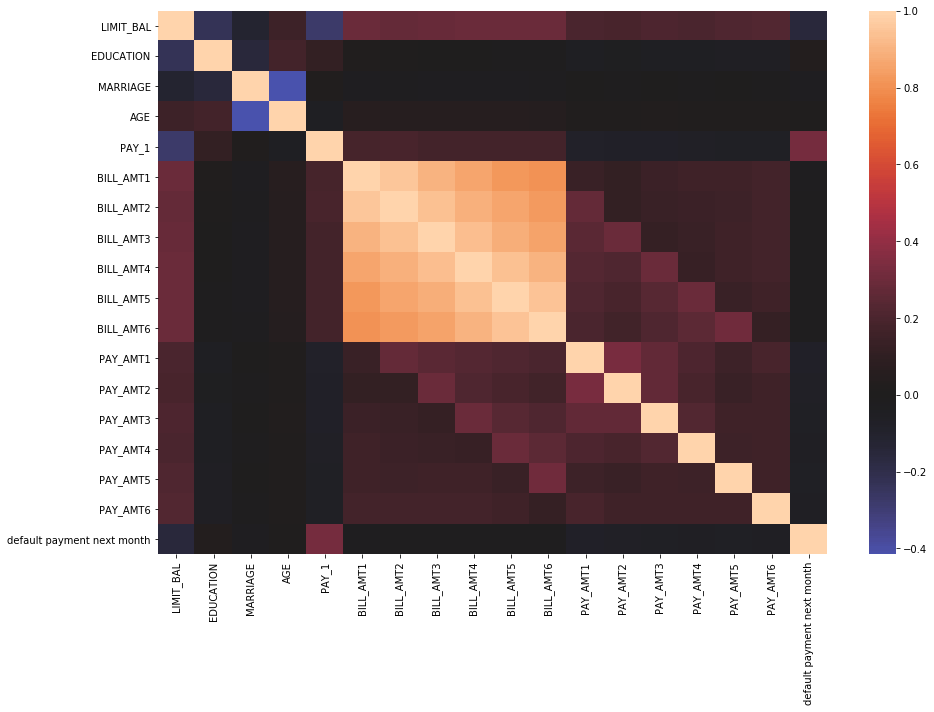

In [46]:
plt.figure(figsize = (15,10))
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values,
           center = 0)
plt.show()

Pearson Correlation is not that applicable for binary data but more applicable for continuous data.


#### F-test and Univariate Feature Selection

 we'll use the F-test to examine the relation between features and response. We will examine this method as part of what is called univariate feature selection: the practice of testing features one by one against the response variable, to see which ones have predictive power

In [47]:
X = df[features_response].iloc[:, :-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [48]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

In [49]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,14.202266,1.645262e-04


The conclusions we can draw from the DataFrame of F-statistics and p-values are similar to what we observed in the correlation plot: PAY_1 and LIMIT_BAL appear to be the most useful features.

In [50]:
from sklearn.feature_selection import SelectPercentile

In [51]:
selector = SelectPercentile(f_classif, percentile=20)

In [52]:
selector.fit(X, y)

SelectPercentile(percentile=20,
                 score_func=<function f_classif at 0x000001B3569E4B88>)

In [53]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [54]:
features = features_response[:-1]

In [55]:
best_features = [features[counter] for counter in range(len(features))
                 if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

The selected features agree with the top four rows of our DataFrame of F-test results, so the feature selection has worked as expected. 

## Visualizing the Relationship between Features and Response

In [56]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [57]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


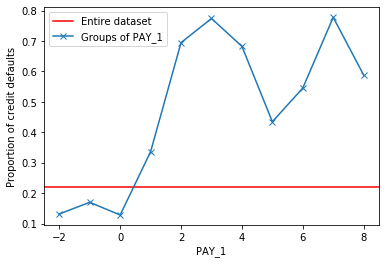

In [58]:
axes = plt.axes()

# plotting a red horizontal line on the axes
axes.axhline(overall_default_rate, color = "red")

group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)

axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

plt.show()

Our visualization of payment statuses has revealed a clear, and probably expected, story: those who defaulted before, are in fact more likely to default again. The default rate of accounts in good standing is well below the overall default rate, which we know from before is about 22%. However, at least 30% of the accounts that were in default last month will be in default again next month, according to this. This is a good visual to share with our business partner as it shows the effect of what may be the most important feature in our model.

In [59]:
pos_mask = y==1
neg_mask = y==0

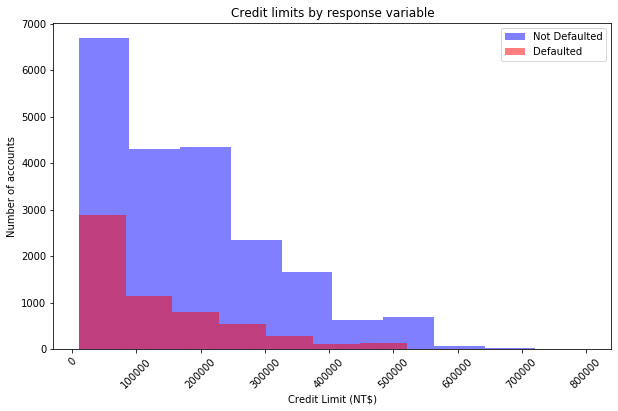

In [60]:
plt.figure(figsize = (10,6))

plt.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha = 0.5, color = 'blue')
plt.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha = 0.5, color = 'red')

plt.tick_params(axis = 'x', labelrotation = 45)

plt.xlabel("Credit Limit (NT$)")
plt.ylabel("Number of accounts")

plt.legend(["Not Defaulted", "Defaulted"])

plt.title("Credit limits by response variable")

plt.show()


In [61]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

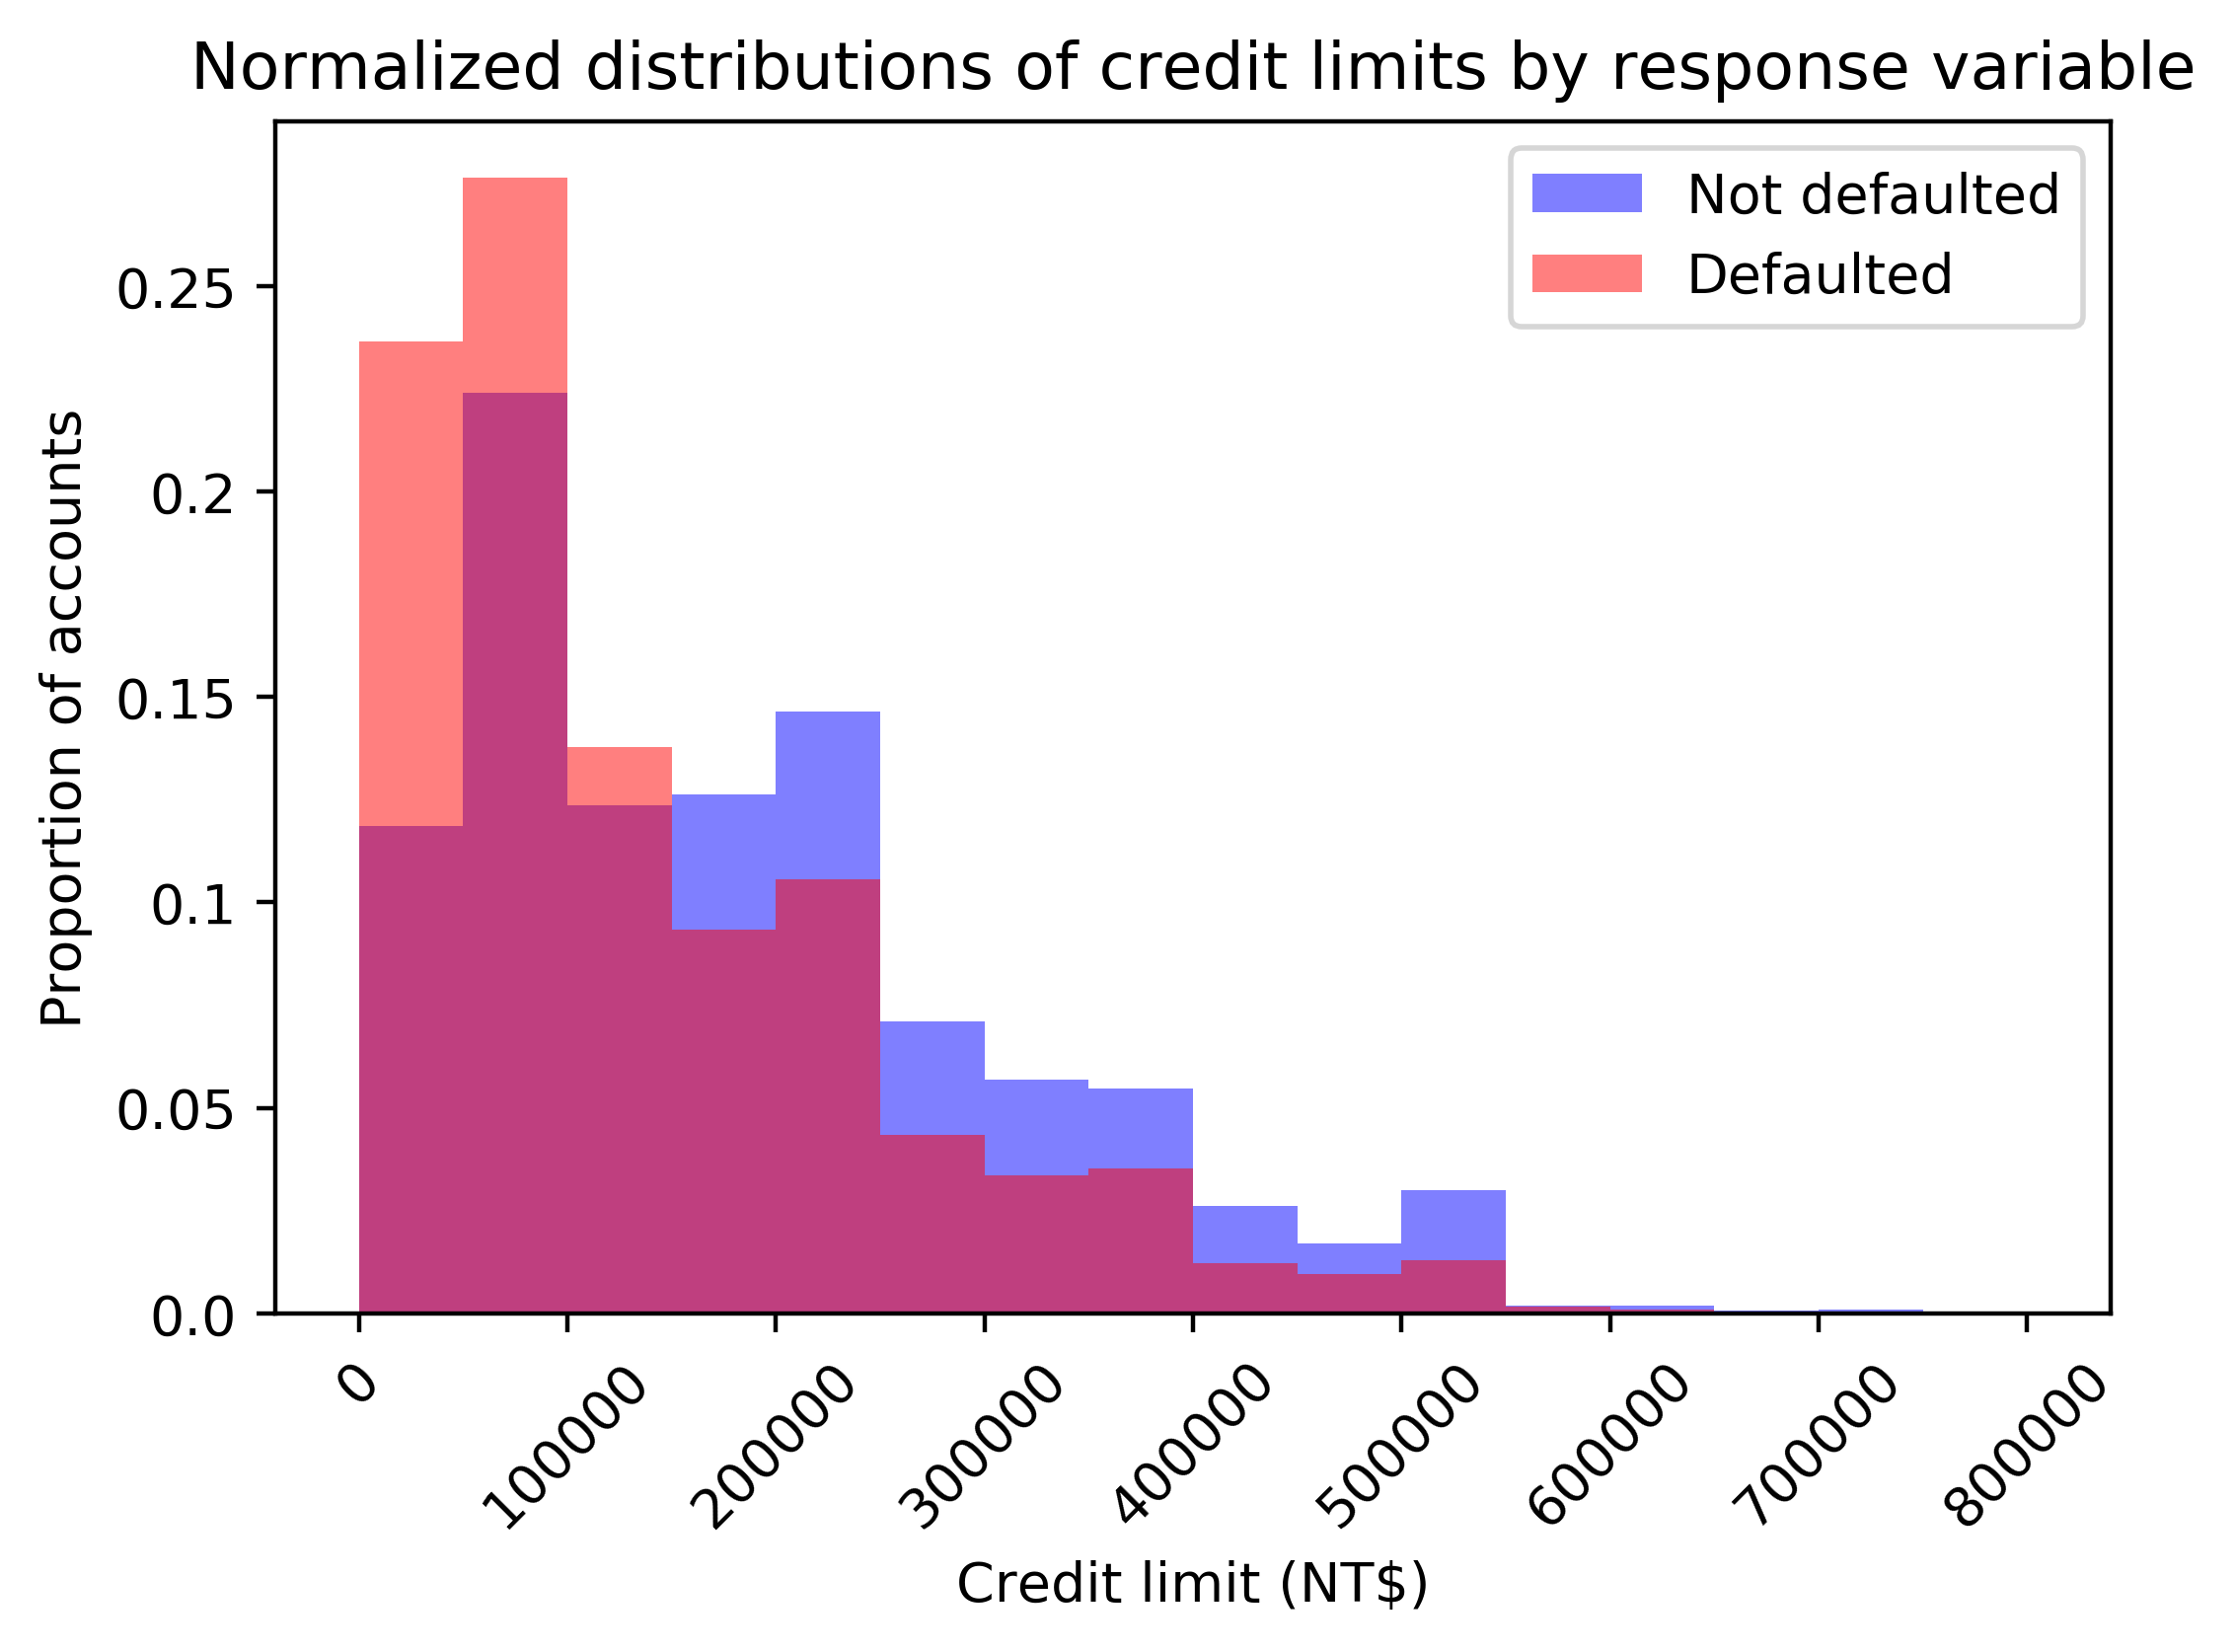

In [62]:
mpl.rcParams['figure.dpi'] = 400 
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

It looks like the accounts that default tend to have a higher proportion of lower credit limits. Accounts with credit limits less than NT$150,000 are relatively more likely to default, while the opposite is true for accounts with limits higher than this.

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [21]:
# Create a train/test split
features = ["PAY_1","LIMIT_BAL"]
x = df[features].values
y = df["default payment next month"].values

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=24)

In [13]:
print("X_train shape is :",x_train.shape)
print("X_test shape is :",x_test.shape)
print("y_train shape is :",y_train.shape)
print("X_test shape is :",y_test.shape)

X_train shape is : (5332, 2)
X_test shape is : (21332, 2)
y_train shape is : (5332,)
X_test shape is : (21332,)


______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [63]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver = 'liblinear')

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [64]:
# Fit the logistic regression model on training data
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
# Make predictions using `.predict()`
y_pred = lr_model.predict(x_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [66]:
# Find class probabilities using `.predict_proba()`
y_proba = lr_model.predict_proba(x_test)
y_proba

array([[0.75129013, 0.24870987],
       [0.5855187 , 0.4144813 ],
       [0.79929294, 0.20070706],
       ...,
       [0.79929294, 0.20070706],
       [0.71058413, 0.28941587],
       [0.69617066, 0.30382934]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [67]:
# Add column of 1s to features

In [68]:
# Get coefficients and intercepts from trained model
coef = lr_model.coef_
intercept = lr_model.intercept_

In [75]:
# Manually calculate predicted probabilities
manual_y_proba = sigmoid((coef * x_test) + intercept)
manual_y_proba

array([[0.5       , 0.24870987],
       [0.5       , 0.4144813 ],
       [0.5       , 0.20070706],
       ...,
       [0.5       , 0.20070706],
       [0.5       , 0.28941587],
       [0.5       , 0.30382934]])

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [76]:
# Manually calculate predicted classes
threshold = 0.5
manual_y_pred = []

for i in manual_y_proba[:, 1]:
    if i >= threshold:
        manual_y_pred.append(1)
    else:
        manual_y_pred.append(0)

manual_y_pred = np.asarray(manual_y_pred)        

manual_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
# Compare to scikit-learn's predicted classes
# Compare to scikit-learn's predicted classes
pos = y_pred == 1
neg = y_pred == 0
manual_pos = manual_y_pred == 1
manual_neg = manual_y_pred == 0
print(f"Positives = {sum(pos)} and Negatives = {sum(neg)} are predicted classes.")
print(f"Positives = {sum(manual_pos)} and Negatives = {sum(manual_neg)} are maually predicted classes.")

Positives = 0 and Negatives = 21332 are predicted classes.
Positives = 0 and Negatives = 21332 are maually predicted classes.


______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [79]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn import metrics

print(f"ROC AUC Score for predicted probabilities: {metrics.roc_auc_score(y_test, y_proba[:, 1])}")


ROC AUC Score for predicted probabilities: 0.6273668088569081


In [80]:
# Use manually calculated predicted probabilities to calculate ROC AUC
print(f"ROC AUC Score for manually predicted probabilities: {metrics.roc_auc_score(y_test, manual_y_proba[:, 1])}")

ROC AUC Score for manually predicted probabilities: 0.6198201139153586
